# Transición de fase en un sistema bidimensional de partículas con potenciales de Lennard-Jones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks


%matplotlib inline

# Data
DATA_PATH = "data/"

# Figures
FIGURES_PATH = "figures/"

In [2]:
densidad = [0.001, 0.01, 0.05, 0.1]
T = [1, 100, 1000]

d = {}
for i in densidad:
    for j in T:
        if j == 1000 and i != 0.1:
            continue
        k = str(i) + "-" + str(j)
        d[k + "-distribucion"] = pd.read_csv(DATA_PATH + k + "/distribucion.txt.csv")
        d[k + "-rdf"] = pd.read_csv(DATA_PATH + k + "/rdf.txt.csv")
        d[k + "-energia"] = pd.read_csv(DATA_PATH + k + "/energias.txt.csv")
df = pd.concat(d.values(), axis=1, keys=d.keys())
df

0.001-1-distribucion                                  0.001-1-rdf  \
             X_(Angstroms) Y_(Angstroms) rho/rho_uniforme r_(Angstroms)   
0                -19.80198    -19.801980              0.0      0.000000   
1                -19.80198    -19.405941              0.0      0.009978   
2                -19.80198    -19.009901              0.0      0.019955   
3                -19.80198    -18.613861              0.0      0.029933   
4                -19.80198    -18.217822              0.0      0.039911   
...                    ...           ...              ...           ...   
22345                  NaN           NaN              NaN    222.950112   
22346                  NaN           NaN              NaN    222.960089   
22347                  NaN           NaN              NaN    222.970067   
22348                  NaN           NaN              NaN    222.980045   
22349                  NaN           NaN              NaN    222.990022   

                         0.001-1-energia                       \
      rho/rho_uniforme promedio_temporal energia_en_cada_paso   
0             0.000000         -0.000952            -0.000952   
1             0.000000         -0.001073            -0.001195   
2             0.000000         -0.001166            -0.001352   
3             0.000000         -0.001249            -0.001496   
4             0.000000         -0.001312            -0.001565   
...                ...               ...                  ...   
22345         1.023084               NaN                  NaN   
22346         1.061671               NaN                  NaN   
22347         1.058762               NaN                  NaN   
22348         1.020085               NaN                  NaN   
22349         1.065820               NaN                  NaN   

      0.001-100-distribucion                                 ...  \
               X_(Angstroms) Y_(Angstroms) rho/rho_uniforme  ...   
0                  -19.80198    -19.801980              0.0  ...   
1                  -19.80198    -19.405941              0.0  ...   
2                  -19.80198    -19.009901              0.0  ...   
3                  -19.80198    -18.613861              0.0  ...   
4                  -19.80198    -18.217822              0.0  ...   
...                      ...           ...              ...  ...   
22345                    NaN           NaN              NaN  ...   
22346                    NaN           NaN              NaN  ...   
22347                    NaN           NaN              NaN  ...   
22348                    NaN           NaN              NaN  ...   
22349                    NaN           NaN              NaN  ...   

           0.1-100-rdf   0.1-100-energia                       \
      rho/rho_uniforme promedio_temporal energia_en_cada_paso   
0                  0.0        476.789050           476.789050   
1                  0.0        247.852997            18.916945   
2                  0.0        166.124937             2.668815   
3                  0.0        124.786490             0.771148   
4                  0.0         99.908607             0.397078   
...                ...               ...                  ...   
22345              NaN               NaN                  NaN   
22346              NaN               NaN                  NaN   
22347              NaN               NaN                  NaN   
22348              NaN               NaN                  NaN   
22349              NaN               NaN                  NaN   

      0.1-1000-distribucion                                 0.1-1000-rdf  \
              X_(Angstroms) Y_(Angstroms) rho/rho_uniforme r_(Angstroms)   
0                 -19.80198    -19.801980              0.0          0.00   
1                 -19.80198    -19.405941              0.0          0.01   
2                 -19.80198    -19.009901              0.0          0.02   
3                 -19.80198    -18.613861              0.0          0.03 

Puntos máximos RDF para simulación 0.001-1: (r, rho/rho_uniforme):  [(3.811454, 688.713303), (6.595213, 45.096953), (7.632886, 13.324192), (10.027517, 3.052703)]


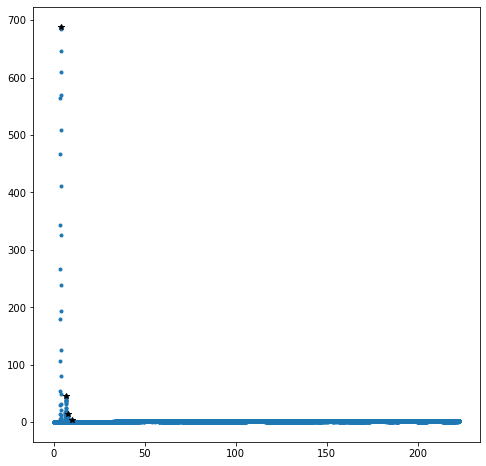

In [3]:
x = df["0.001-1-rdf"]["r_(Angstroms)"]
y = df["0.001-1-rdf"]["rho/rho_uniforme"]

peaks, _ = find_peaks(y, threshold=1)
print("Puntos máximos RDF para simulación 0.001-1: (r, rho/rho_uniforme): ", list(zip(x[peaks], y[peaks])))

plt.figure(figsize=(8, 8))
plt.plot(x, y, ".")
plt.plot(x[peaks], y[peaks], "k*")

Puntos máximos RDF para simulación 0.1-1: (r, rho/rho_uniforme):  [(3.08, 0.97466), (3.1, 0.995226), (3.12, 1.303987), (3.16, 0.944172), (3.24, 17.668239), (3.26, 11.725269), (3.28, 10.796827), (3.3, 13.16847), (3.33, 13.657249), (3.35, 10.966301), (3.46, 2.44829), (3.5, 2.275022), (3.54, 1.454285), (3.84, 0.275389), (3.87, 0.234221), (3.89, 0.211618), (3.93, 0.210252), (3.95, 0.162355), (5.12, 0.222873), (5.29, 0.315997), (5.35, 0.552275), (5.4, 0.703662), (5.43, 1.058187), (5.66, 3.172646), (5.69, 3.31747), (5.71, 2.332468), (5.75, 3.361736), (5.8, 5.013264), (5.83, 3.996551), (5.86, 3.925578), (5.88, 2.986373), (5.94, 2.240672), (6.0, 1.69957), (6.02, 1.404434), (6.07, 1.289209), (6.1, 1.004252), (6.21, 0.993432), (6.24, 0.61198), (6.28, 0.926864), (6.48, 4.261946), (6.53, 2.72193), (6.58, 2.560152), (6.6, 3.478293), (6.73, 2.305577), (6.88, 0.95998), (6.91, 0.741973), (7.0, 0.916652), (7.21, 0.450548), (7.26, 0.283426), (7.4, 0.316005), (7.47, 0.246141), (8.1, 0.413263), (8.13, 0.3

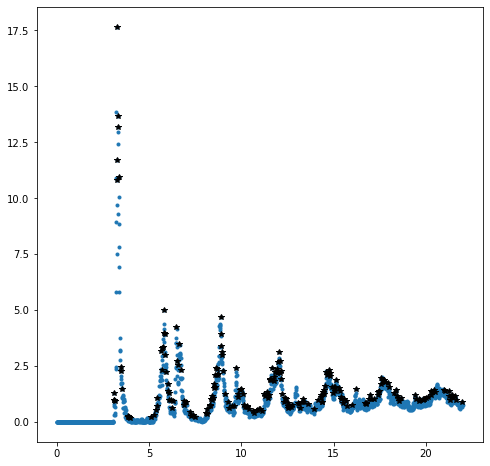

In [4]:
x = df["0.1-1-rdf"]["r_(Angstroms)"]
y = df["0.1-1-rdf"]["rho/rho_uniforme"]

peaks, _ = find_peaks(y, threshold=0.1)
print("Puntos máximos RDF para simulación 0.1-1: (r, rho/rho_uniforme): ", list(zip(x[peaks], y[peaks])))

plt.figure(figsize=(8, 8))
plt.plot(x, y, ".")
plt.plot(x[peaks], y[peaks], "k*")

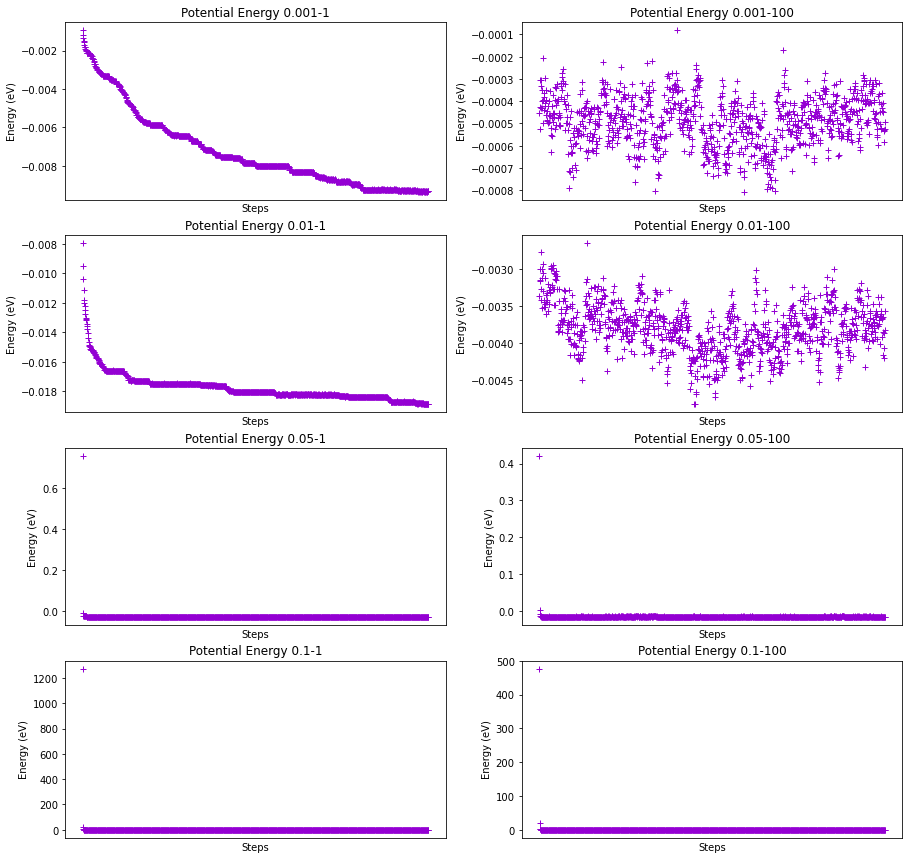

In [5]:
n = len(densidad)
m = len(T) - 1

fig, ax = plt.subplots(n, m, figsize=(15, 15))

for i in range(0, len(densidad)):
    for j in range(0, len(T)):
        if T[j] == 1000:
            continue
        x = range(0, len(df[f"{densidad[i]}-{T[j]}-energia"]["promedio_temporal"].dropna().to_numpy()))
        y = df[f"{densidad[i]}-{T[j]}-energia"]["energia_en_cada_paso"].dropna().to_numpy()
        ax[i, j].plot(x, y, "+", color="darkviolet")
        ax[i, j].set_xlabel("Steps")
        ax[i, j].set_ylabel("Energy (eV)")
        ax[i, j].set_title(f"Potential Energy {densidad[i]}-{T[j]}")
        ax[i, j].set_xticks([])

plt.savefig(FIGURES_PATH + "energias.png")

In [6]:
empaquetamiento = (np.pi) / (2 * np.sqrt(3))
sigma = 3.4 # parámetro Lennard-Jones para argón
densidad_planar = 2 / ((sigma ** 2) * np.sqrt(3)) # número de átomos / area de hexágono

print("Factor de empaquetamiento hexagonal esferas duras: ", empaquetamiento)
print("Densidad planar hexágono esferas duras: ", densidad_planar)

Factor de empaquetamiento hexagonal esferas duras:  0.9068996821171089
Densidad planar hexágono esferas duras:  0.09988758982519479
